In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier

## Load and Explore the MNIST Dataset
This section loads the MNIST dataset and displays basic information about its structure.

In [6]:
train_set = pd.read_csv("mnist_train.csv")
test_set = pd.read_csv("mnist_test.csv")

train_images = train_set.drop("label", axis=1).values
train_labels = train_set["label"].values

test_images = test_set.drop("label", axis=1).values
test_labels = test_set["label"].values

train_images = train_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)

print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


## Visualize Sample Images
Display a few sample images from the training dataset.

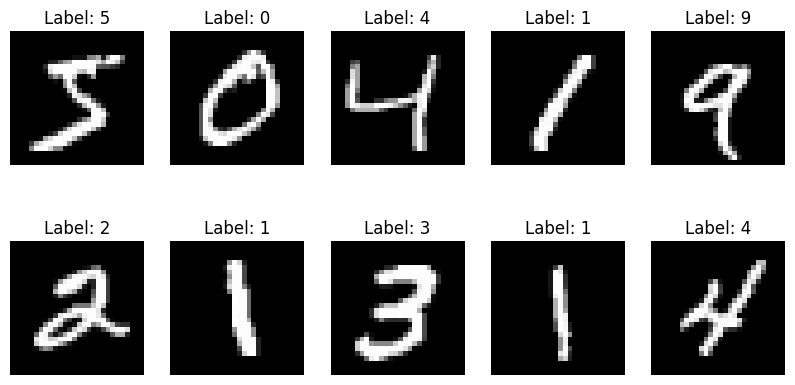

In [7]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

## Distribution of Labels
Visualize the distribution of digits in the training set.

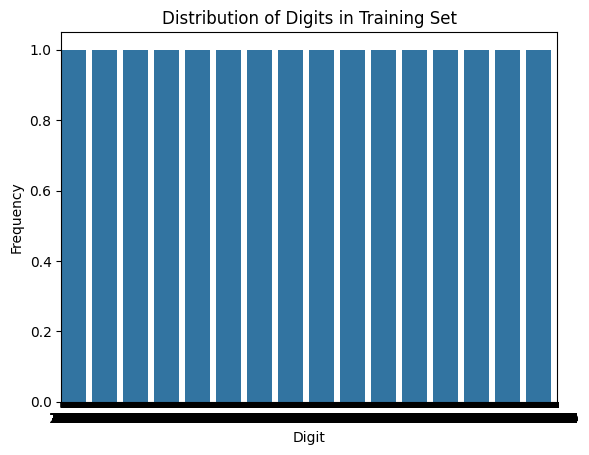

In [8]:
sns.countplot(train_labels)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.show()

## Pixel Value Distribution
Flatten the images and analyze the distribution of pixel intensities.

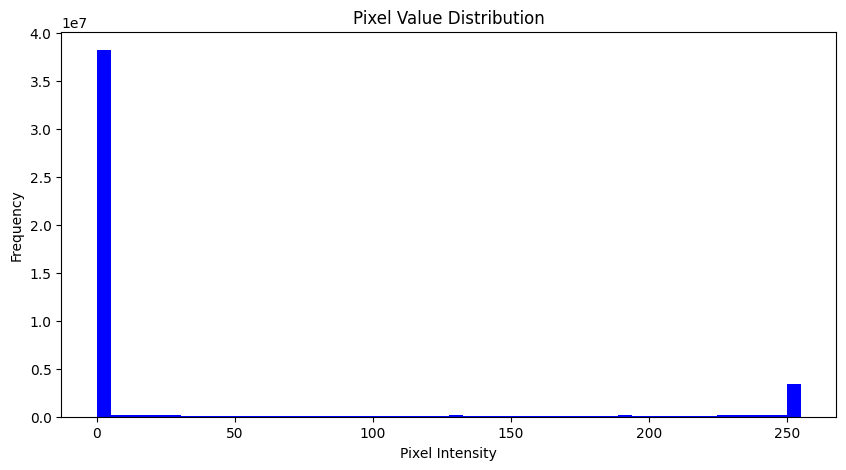

In [9]:
flattened_images = train_images.reshape(-1, 28*28)
plt.figure(figsize=(10, 5))
plt.hist(flattened_images.ravel(), bins=50, color='blue')
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

## Mean Images for Each Digit
Compute and display the average image for each digit class.

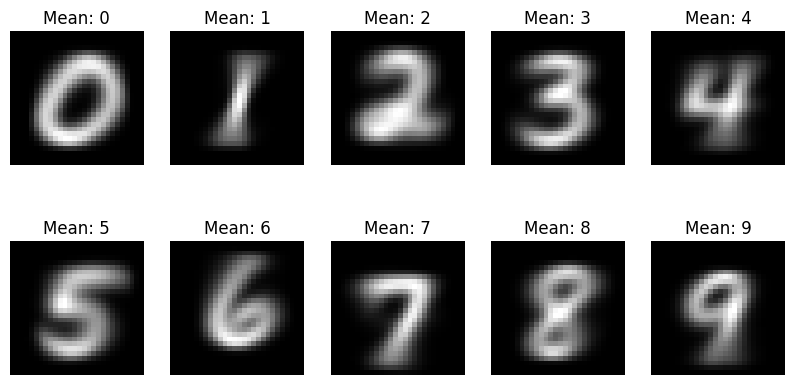

In [10]:
mean_images = [np.mean(train_images[train_labels == i], axis=0) for i in range(10)]
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(mean_images[i], cmap='gray')
    plt.title(f"Mean: {i}")
    plt.axis('off')
plt.show()

## Correlation Matrix of Mean Images
Analyze correlations between the average images of each digit.

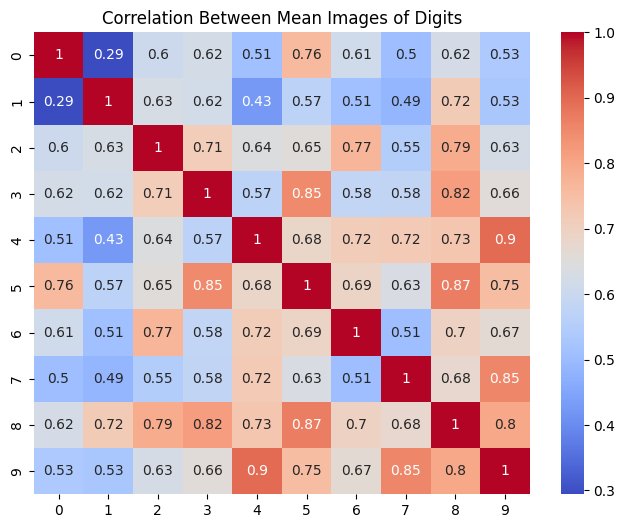

In [11]:
mean_images_flat = np.array([img.flatten() for img in mean_images])
correlation_matrix = np.corrcoef(mean_images_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Mean Images of Digits")
plt.show()

## PCA Analysis
Reduce the dimensions of the data using PCA and visualize the first two principal components.

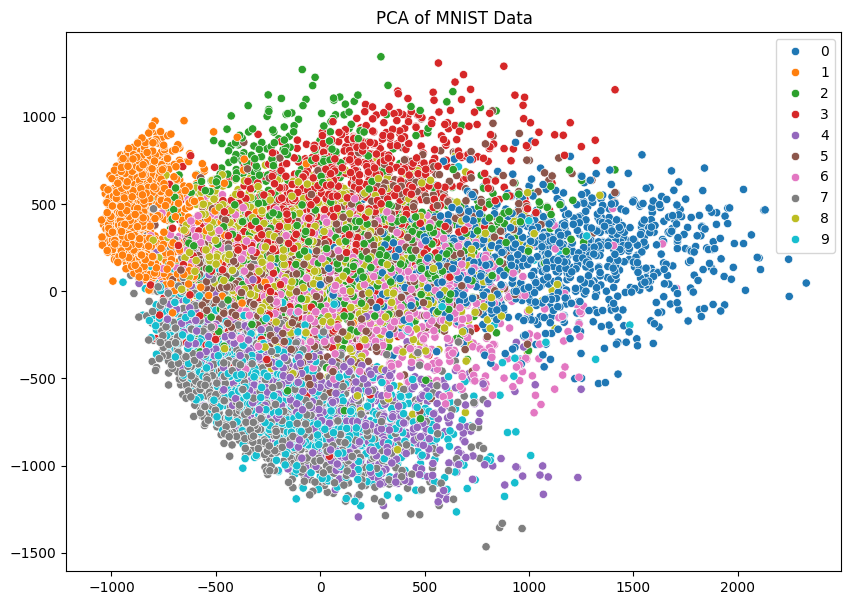

In [12]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
pca = PCA(n_components=2)
train_images_pca = pca.fit_transform(train_images_flat)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=train_images_pca[:10000, 0], y=train_images_pca[:10000, 1], hue=train_labels[:10000], palette='tab10')
plt.title('PCA of MNIST Data')
plt.show()

## Class Imbalance Check
Check the distribution of digit classes in the training data.

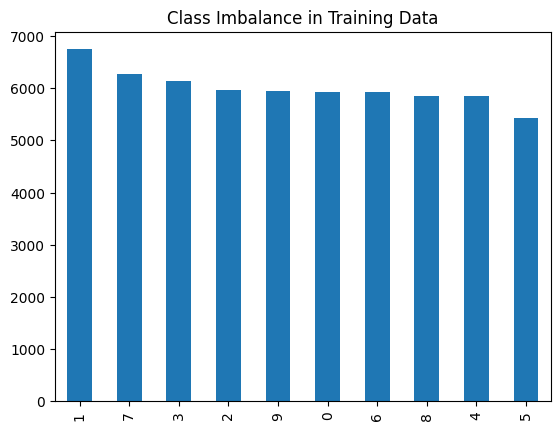

In [13]:
train_label_counts = pd.Series(train_labels).value_counts()
train_label_counts.plot(kind='bar', title='Class Imbalance in Training Data')
plt.show()

## Image Dimension Analysis
Analyze the dimensions of the images in the dataset.

Image dimensions: 28x28


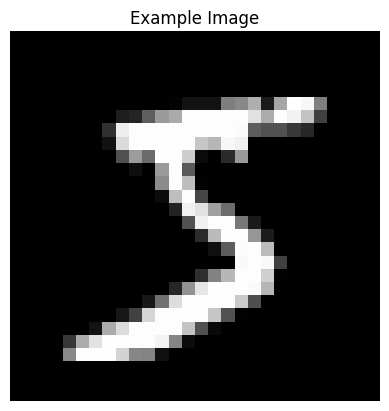

In [14]:
image_height, image_width = train_images.shape[1], train_images.shape[2]
print(f"Image dimensions: {image_height}x{image_width}")

# Visualize the shape of one image
plt.imshow(train_images[0], cmap='gray')
plt.title("Example Image")
plt.axis('off')
plt.show()

## Confusion Matrix Visualization
Simulate a confusion matrix for classification results.

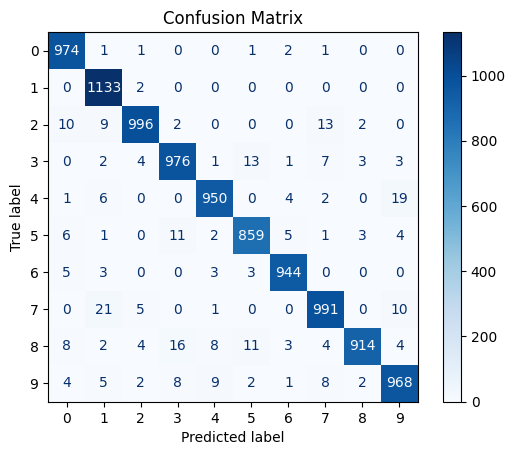

In [15]:
X_train = train_images.reshape(-1, 28*28)
X_test = test_images.reshape(-1, 28*28)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, train_labels)
predictions = knn.predict(X_test)
cm = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Visualizing Misclassified Images
Display some misclassified images and compare predicted vs. actual labels.

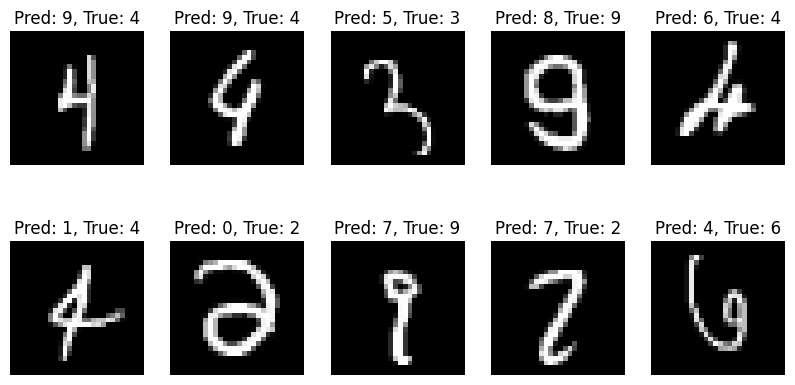

In [16]:
misclassified_indices = np.where(predictions != test_labels)[0]

# Plot some misclassified images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[misclassified_indices[i]], cmap='gray')
    plt.title(f"Pred: {predictions[misclassified_indices[i]]}, True: {test_labels[misclassified_indices[i]]}")
    plt.axis('off')
plt.show()

## Effects of Image Preprocessing
Compare original vs. normalized images to see preprocessing effects.

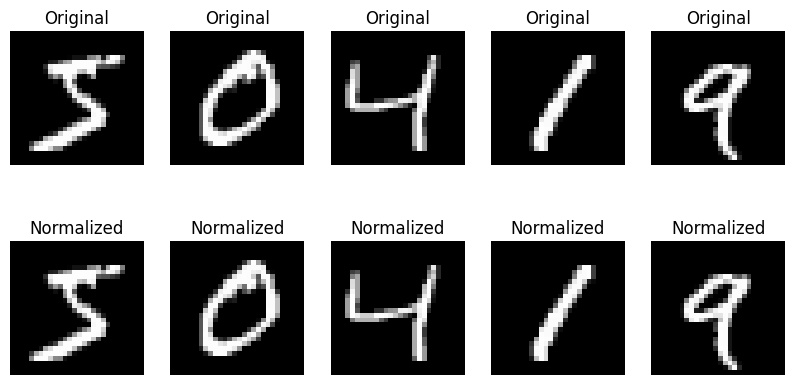

In [17]:
normalized_images = train_images / 255.0

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2, 5, i + 6)
    plt.imshow(normalized_images[i], cmap='gray')
    plt.title("Normalized")
    plt.axis('off')
plt.show()

## Histogram of Pixel Intensity for Each Digit
Analyze pixel intensity distribution across each digit class.

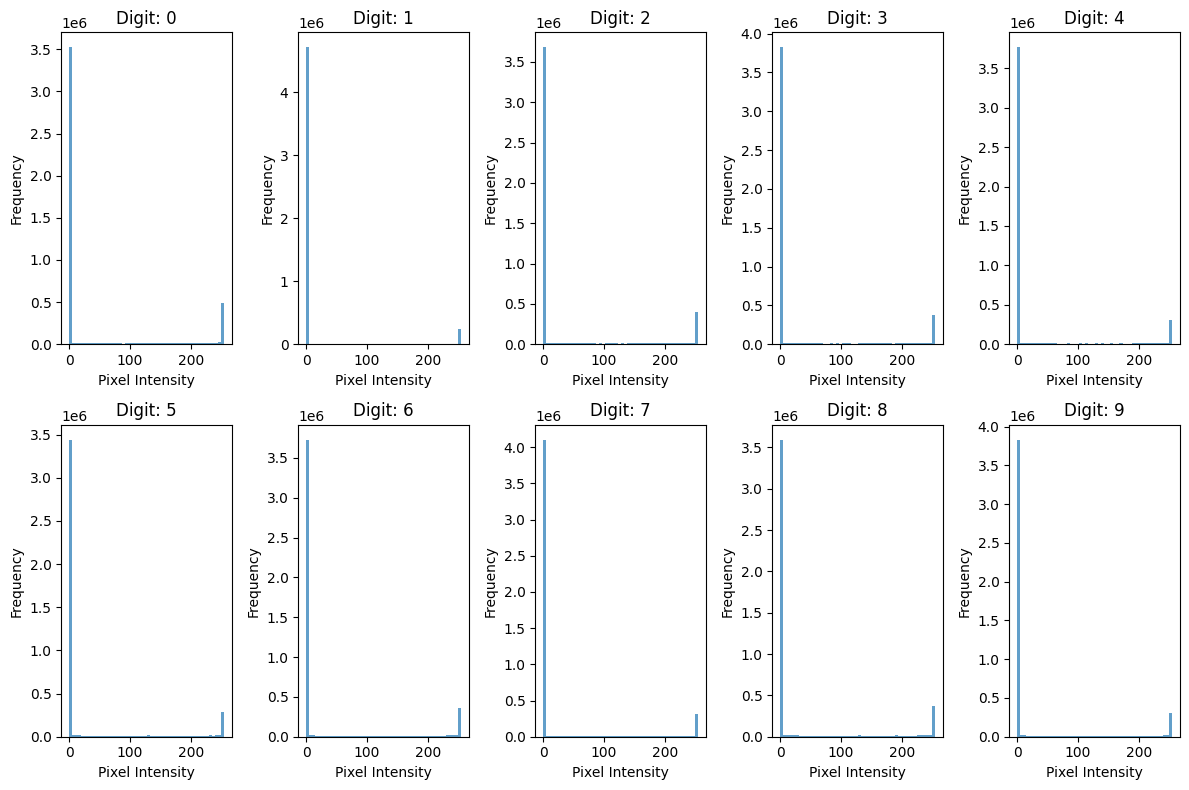

In [18]:
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.hist(train_images[train_labels == i].ravel(), bins=50, alpha=0.7)
    plt.title(f'Digit: {i}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Mean Pixel Intensity per Digit
Calculate and plot the average pixel intensity for each digit class.

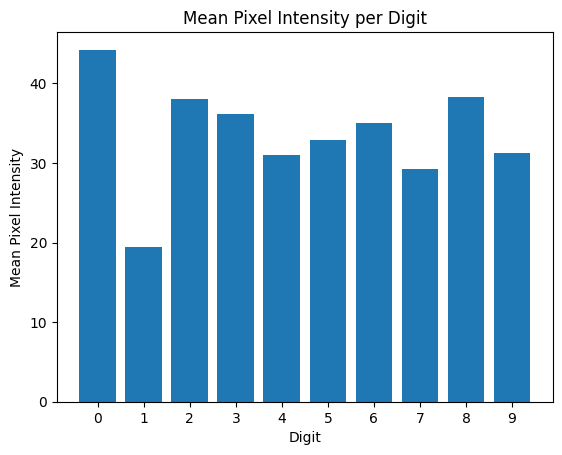

In [19]:
mean_pixel_intensity = [np.mean(train_images[train_labels == i]) for i in range(10)]
plt.bar(range(10), mean_pixel_intensity)
plt.xlabel("Digit")
plt.ylabel("Mean Pixel Intensity")
plt.title("Mean Pixel Intensity per Digit")
plt.xticks(range(10))
plt.show()

## K-Means Clustering
Apply K-Means to a subset of images and visualize cluster centers.

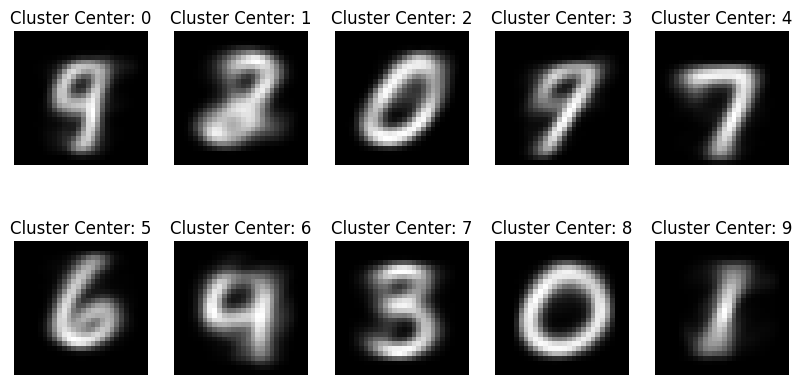

In [20]:
sample_data = train_images_flat[:10000]
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(sample_data)

# Visualize the cluster centers
cluster_centers = kmeans.cluster_centers_.reshape(10, 28, 28)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(cluster_centers[i], cmap='gray')
    plt.title(f"Cluster Center: {i}")
    plt.axis('off')
plt.show()

## PCA Explained Variance
Plot the cumulative explained variance of principal components.

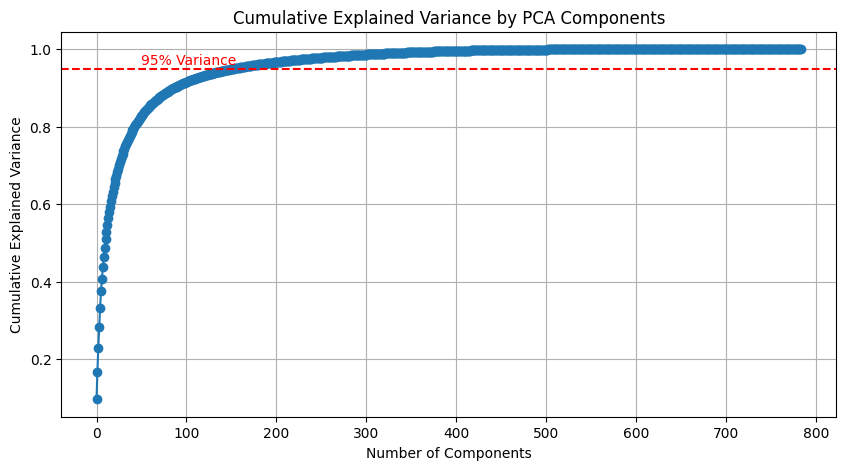

In [21]:
pca = PCA()
pca.fit(train_images_flat)

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(50, 0.96, '95% Variance', color='red')
plt.show()

## Exploring Image Noise and Robustness
Add noise to images and assess model robustness.

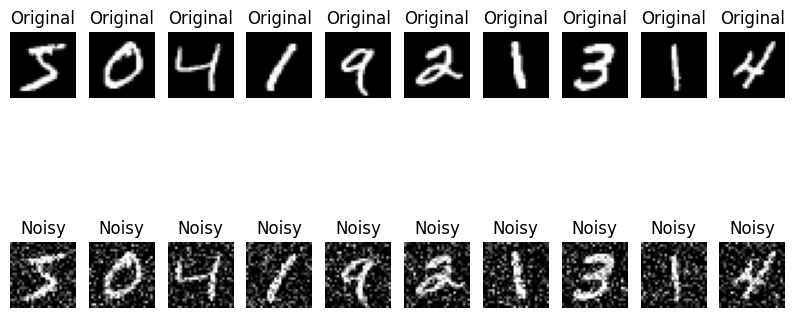

In [22]:
def add_noise(images, noise_factor=0.3):
    noisy_images = images + noise_factor * np.random.randn(*images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

# Add noise to a sample of training images
noisy_images = add_noise(normalized_images[:10])

# Visualize original vs. noisy images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(normalized_images[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2, 10, i + 11)
    plt.imshow(noisy_images[i], cmap='gray')
    plt.title("Noisy")
    plt.axis('off')
plt.show()

## Detecting Outliers
Use Isolation Forest to identify and visualize outliers.

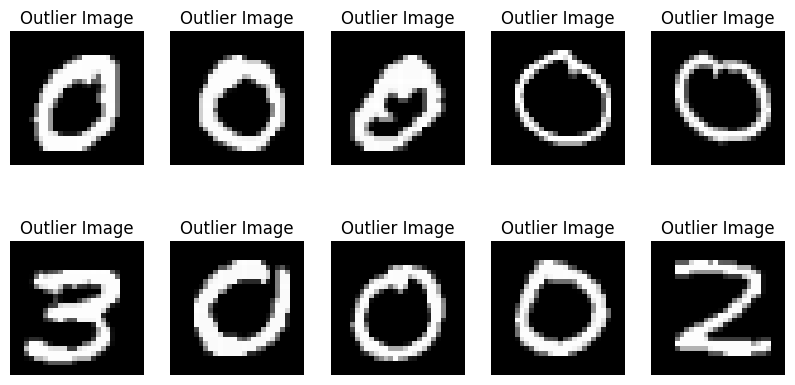

In [23]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso_forest.fit_predict(train_images_flat)

# Find outlier indices
outlier_indices = np.where(outlier_pred == -1)[0]

# Plot some outliers
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[outlier_indices[i]], cmap='gray')
    plt.title("Outlier Image")
    plt.axis('off')
plt.show()